In [1]:
import numpy as np 
import pandas as pd 
import os
import glob
import cv2
import random
import sys
import shutil
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
from os import path
from PIL import Image
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD, RMSprop
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils

Using TensorFlow backend.
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packag

In [2]:
PATH = './HRF/training'

In [3]:
images=glob.glob(os.path.join(PATH,'images','*.jpg'))
mask=glob.glob(os.path.join(PATH,'1st_manual','*.tif'))
if not os.path.exists('./HRF/training/output_images'):
    os.makedirs('./HRF/training/output_images')
if not os.path.exists('./HRF/training/output_1st_manual'):
    os.makedirs('./HRF/training/output_1st_manual')
src = "./HRF/training/images/"
dst = "./HRF/training/output_images/"
src1= "./HRF/training/1st_manual/"
dst1 = "./HRF/training/output_1st_manual/"

In [4]:
cropheight=900
cropwidth = 600
k=-1
for file in images:
    k+=1
    im = Image.open(images[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (images[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (images[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

./HRF/training\images\01_dr.JPG (0, 0, 600, 900)
./HRF/training\images\01_dr.JPG (0, 900, 600, 1800)
./HRF/training\images\01_dr.JPG (0, 1800, 600, 2700)
./HRF/training\images\01_dr.JPG (600, 0, 1200, 900)
./HRF/training\images\01_dr.JPG (600, 900, 1200, 1800)
./HRF/training\images\01_dr.JPG (600, 1800, 1200, 2700)
./HRF/training\images\01_dr.JPG (1200, 0, 1800, 900)
./HRF/training\images\01_dr.JPG (1200, 900, 1800, 1800)
./HRF/training\images\01_dr.JPG (1200, 1800, 1800, 2700)
./HRF/training\images\01_dr.JPG (1800, 0, 2400, 900)
./HRF/training\images\01_dr.JPG (1800, 900, 2400, 1800)
./HRF/training\images\01_dr.JPG (1800, 1800, 2400, 2700)
./HRF/training\images\01_dr.JPG (2400, 0, 3000, 900)
./HRF/training\images\01_dr.JPG (2400, 900, 3000, 1800)
./HRF/training\images\01_dr.JPG (2400, 1800, 3000, 2700)
./HRF/training\images\01_dr.JPG (3000, 0, 3600, 900)
./HRF/training\images\01_dr.JPG (3000, 900, 3600, 1800)
./HRF/training\images\01_dr.JPG (3000, 1800, 3600, 2700)
./HRF/training\imag

./HRF/training\images\03_h.jpg (3000, 0, 3600, 900)
./HRF/training\images\03_h.jpg (3000, 900, 3600, 1800)
./HRF/training\images\03_h.jpg (3000, 1800, 3600, 2700)
./HRF/training\images\04_dr.JPG (0, 0, 600, 900)
./HRF/training\images\04_dr.JPG (0, 900, 600, 1800)
./HRF/training\images\04_dr.JPG (0, 1800, 600, 2700)
./HRF/training\images\04_dr.JPG (600, 0, 1200, 900)
./HRF/training\images\04_dr.JPG (600, 900, 1200, 1800)
./HRF/training\images\04_dr.JPG (600, 1800, 1200, 2700)
./HRF/training\images\04_dr.JPG (1200, 0, 1800, 900)
./HRF/training\images\04_dr.JPG (1200, 900, 1800, 1800)
./HRF/training\images\04_dr.JPG (1200, 1800, 1800, 2700)
./HRF/training\images\04_dr.JPG (1800, 0, 2400, 900)
./HRF/training\images\04_dr.JPG (1800, 900, 2400, 1800)
./HRF/training\images\04_dr.JPG (1800, 1800, 2400, 2700)
./HRF/training\images\04_dr.JPG (2400, 0, 3000, 900)
./HRF/training\images\04_dr.JPG (2400, 900, 3000, 1800)
./HRF/training\images\04_dr.JPG (2400, 1800, 3000, 2700)
./HRF/training\images\

./HRF/training\images\07_dr.JPG (0, 0, 600, 900)
./HRF/training\images\07_dr.JPG (0, 900, 600, 1800)
./HRF/training\images\07_dr.JPG (0, 1800, 600, 2700)
./HRF/training\images\07_dr.JPG (600, 0, 1200, 900)
./HRF/training\images\07_dr.JPG (600, 900, 1200, 1800)
./HRF/training\images\07_dr.JPG (600, 1800, 1200, 2700)
./HRF/training\images\07_dr.JPG (1200, 0, 1800, 900)
./HRF/training\images\07_dr.JPG (1200, 900, 1800, 1800)
./HRF/training\images\07_dr.JPG (1200, 1800, 1800, 2700)
./HRF/training\images\07_dr.JPG (1800, 0, 2400, 900)
./HRF/training\images\07_dr.JPG (1800, 900, 2400, 1800)
./HRF/training\images\07_dr.JPG (1800, 1800, 2400, 2700)
./HRF/training\images\07_dr.JPG (2400, 0, 3000, 900)
./HRF/training\images\07_dr.JPG (2400, 900, 3000, 1800)
./HRF/training\images\07_dr.JPG (2400, 1800, 3000, 2700)
./HRF/training\images\07_dr.JPG (3000, 0, 3600, 900)
./HRF/training\images\07_dr.JPG (3000, 900, 3600, 1800)
./HRF/training\images\07_dr.JPG (3000, 1800, 3600, 2700)
./HRF/training\imag

./HRF/training\images\10_dr.JPG (0, 900, 600, 1800)
./HRF/training\images\10_dr.JPG (0, 1800, 600, 2700)
./HRF/training\images\10_dr.JPG (600, 0, 1200, 900)
./HRF/training\images\10_dr.JPG (600, 900, 1200, 1800)
./HRF/training\images\10_dr.JPG (600, 1800, 1200, 2700)
./HRF/training\images\10_dr.JPG (1200, 0, 1800, 900)
./HRF/training\images\10_dr.JPG (1200, 900, 1800, 1800)
./HRF/training\images\10_dr.JPG (1200, 1800, 1800, 2700)
./HRF/training\images\10_dr.JPG (1800, 0, 2400, 900)
./HRF/training\images\10_dr.JPG (1800, 900, 2400, 1800)
./HRF/training\images\10_dr.JPG (1800, 1800, 2400, 2700)
./HRF/training\images\10_dr.JPG (2400, 0, 3000, 900)
./HRF/training\images\10_dr.JPG (2400, 900, 3000, 1800)
./HRF/training\images\10_dr.JPG (2400, 1800, 3000, 2700)
./HRF/training\images\10_dr.JPG (3000, 0, 3600, 900)
./HRF/training\images\10_dr.JPG (3000, 900, 3600, 1800)
./HRF/training\images\10_dr.JPG (3000, 1800, 3600, 2700)
./HRF/training\images\10_g.jpg (0, 0, 600, 900)
./HRF/training\image

./HRF/training\images\12_h.jpg (1800, 900, 2400, 1800)
./HRF/training\images\12_h.jpg (1800, 1800, 2400, 2700)
./HRF/training\images\12_h.jpg (2400, 0, 3000, 900)
./HRF/training\images\12_h.jpg (2400, 900, 3000, 1800)
./HRF/training\images\12_h.jpg (2400, 1800, 3000, 2700)
./HRF/training\images\12_h.jpg (3000, 0, 3600, 900)
./HRF/training\images\12_h.jpg (3000, 900, 3600, 1800)
./HRF/training\images\12_h.jpg (3000, 1800, 3600, 2700)
./HRF/training\images\13_dr.JPG (0, 0, 600, 900)
./HRF/training\images\13_dr.JPG (0, 900, 600, 1800)
./HRF/training\images\13_dr.JPG (0, 1800, 600, 2700)
./HRF/training\images\13_dr.JPG (600, 0, 1200, 900)
./HRF/training\images\13_dr.JPG (600, 900, 1200, 1800)
./HRF/training\images\13_dr.JPG (600, 1800, 1200, 2700)
./HRF/training\images\13_dr.JPG (1200, 0, 1800, 900)
./HRF/training\images\13_dr.JPG (1200, 900, 1800, 1800)
./HRF/training\images\13_dr.JPG (1200, 1800, 1800, 2700)
./HRF/training\images\13_dr.JPG (1800, 0, 2400, 900)
./HRF/training\images\13_dr

In [5]:
cropheight=900
cropwidth = 600
k=-1
for file in mask:
    k+=1
    im = Image.open(mask[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (mask[k], box))
       im.crop(box).save('%s.width%03d.height%03d.jpg' % (mask[k], i, j))
       files = [i for i in os.listdir(src1) if i.endswith(".jpg") and path.isfile(path.join(src1, i))]
       for f in files:
        shutil.move(path.join(src1, f), dst1)

./HRF/training\1st_manual\01_dr.tif (0, 0, 600, 900)
./HRF/training\1st_manual\01_dr.tif (0, 900, 600, 1800)
./HRF/training\1st_manual\01_dr.tif (0, 1800, 600, 2700)
./HRF/training\1st_manual\01_dr.tif (600, 0, 1200, 900)
./HRF/training\1st_manual\01_dr.tif (600, 900, 1200, 1800)
./HRF/training\1st_manual\01_dr.tif (600, 1800, 1200, 2700)
./HRF/training\1st_manual\01_dr.tif (1200, 0, 1800, 900)
./HRF/training\1st_manual\01_dr.tif (1200, 900, 1800, 1800)
./HRF/training\1st_manual\01_dr.tif (1200, 1800, 1800, 2700)
./HRF/training\1st_manual\01_dr.tif (1800, 0, 2400, 900)
./HRF/training\1st_manual\01_dr.tif (1800, 900, 2400, 1800)
./HRF/training\1st_manual\01_dr.tif (1800, 1800, 2400, 2700)
./HRF/training\1st_manual\01_dr.tif (2400, 0, 3000, 900)
./HRF/training\1st_manual\01_dr.tif (2400, 900, 3000, 1800)
./HRF/training\1st_manual\01_dr.tif (2400, 1800, 3000, 2700)
./HRF/training\1st_manual\01_dr.tif (3000, 0, 3600, 900)
./HRF/training\1st_manual\01_dr.tif (3000, 900, 3600, 1800)
./HRF/tr

./HRF/training\1st_manual\04_dr.tif (1200, 900, 1800, 1800)
./HRF/training\1st_manual\04_dr.tif (1200, 1800, 1800, 2700)
./HRF/training\1st_manual\04_dr.tif (1800, 0, 2400, 900)
./HRF/training\1st_manual\04_dr.tif (1800, 900, 2400, 1800)
./HRF/training\1st_manual\04_dr.tif (1800, 1800, 2400, 2700)
./HRF/training\1st_manual\04_dr.tif (2400, 0, 3000, 900)
./HRF/training\1st_manual\04_dr.tif (2400, 900, 3000, 1800)
./HRF/training\1st_manual\04_dr.tif (2400, 1800, 3000, 2700)
./HRF/training\1st_manual\04_dr.tif (3000, 0, 3600, 900)
./HRF/training\1st_manual\04_dr.tif (3000, 900, 3600, 1800)
./HRF/training\1st_manual\04_dr.tif (3000, 1800, 3600, 2700)
./HRF/training\1st_manual\04_g.tif (0, 0, 600, 900)
./HRF/training\1st_manual\04_g.tif (0, 900, 600, 1800)
./HRF/training\1st_manual\04_g.tif (0, 1800, 600, 2700)
./HRF/training\1st_manual\04_g.tif (600, 0, 1200, 900)
./HRF/training\1st_manual\04_g.tif (600, 900, 1200, 1800)
./HRF/training\1st_manual\04_g.tif (600, 1800, 1200, 2700)
./HRF/trai

./HRF/training\1st_manual\07_g.tif (1200, 0, 1800, 900)
./HRF/training\1st_manual\07_g.tif (1200, 900, 1800, 1800)
./HRF/training\1st_manual\07_g.tif (1200, 1800, 1800, 2700)
./HRF/training\1st_manual\07_g.tif (1800, 0, 2400, 900)
./HRF/training\1st_manual\07_g.tif (1800, 900, 2400, 1800)
./HRF/training\1st_manual\07_g.tif (1800, 1800, 2400, 2700)
./HRF/training\1st_manual\07_g.tif (2400, 0, 3000, 900)
./HRF/training\1st_manual\07_g.tif (2400, 900, 3000, 1800)
./HRF/training\1st_manual\07_g.tif (2400, 1800, 3000, 2700)
./HRF/training\1st_manual\07_g.tif (3000, 0, 3600, 900)
./HRF/training\1st_manual\07_g.tif (3000, 900, 3600, 1800)
./HRF/training\1st_manual\07_g.tif (3000, 1800, 3600, 2700)
./HRF/training\1st_manual\07_h.tif (0, 0, 600, 900)
./HRF/training\1st_manual\07_h.tif (0, 900, 600, 1800)
./HRF/training\1st_manual\07_h.tif (0, 1800, 600, 2700)
./HRF/training\1st_manual\07_h.tif (600, 0, 1200, 900)
./HRF/training\1st_manual\07_h.tif (600, 900, 1200, 1800)
./HRF/training\1st_manua

./HRF/training\1st_manual\10_g.tif (1800, 1800, 2400, 2700)
./HRF/training\1st_manual\10_g.tif (2400, 0, 3000, 900)
./HRF/training\1st_manual\10_g.tif (2400, 900, 3000, 1800)
./HRF/training\1st_manual\10_g.tif (2400, 1800, 3000, 2700)
./HRF/training\1st_manual\10_g.tif (3000, 0, 3600, 900)
./HRF/training\1st_manual\10_g.tif (3000, 900, 3600, 1800)
./HRF/training\1st_manual\10_g.tif (3000, 1800, 3600, 2700)
./HRF/training\1st_manual\10_h.tif (0, 0, 600, 900)
./HRF/training\1st_manual\10_h.tif (0, 900, 600, 1800)
./HRF/training\1st_manual\10_h.tif (0, 1800, 600, 2700)
./HRF/training\1st_manual\10_h.tif (600, 0, 1200, 900)
./HRF/training\1st_manual\10_h.tif (600, 900, 1200, 1800)
./HRF/training\1st_manual\10_h.tif (600, 1800, 1200, 2700)
./HRF/training\1st_manual\10_h.tif (1200, 0, 1800, 900)
./HRF/training\1st_manual\10_h.tif (1200, 900, 1800, 1800)
./HRF/training\1st_manual\10_h.tif (1200, 1800, 1800, 2700)
./HRF/training\1st_manual\10_h.tif (1800, 0, 2400, 900)
./HRF/training\1st_manua

./HRF/training\1st_manual\13_h.tif (600, 900, 1200, 1800)
./HRF/training\1st_manual\13_h.tif (600, 1800, 1200, 2700)
./HRF/training\1st_manual\13_h.tif (1200, 0, 1800, 900)
./HRF/training\1st_manual\13_h.tif (1200, 900, 1800, 1800)
./HRF/training\1st_manual\13_h.tif (1200, 1800, 1800, 2700)
./HRF/training\1st_manual\13_h.tif (1800, 0, 2400, 900)
./HRF/training\1st_manual\13_h.tif (1800, 900, 2400, 1800)
./HRF/training\1st_manual\13_h.tif (1800, 1800, 2400, 2700)
./HRF/training\1st_manual\13_h.tif (2400, 0, 3000, 900)
./HRF/training\1st_manual\13_h.tif (2400, 900, 3000, 1800)
./HRF/training\1st_manual\13_h.tif (2400, 1800, 3000, 2700)
./HRF/training\1st_manual\13_h.tif (3000, 0, 3600, 900)
./HRF/training\1st_manual\13_h.tif (3000, 900, 3600, 1800)
./HRF/training\1st_manual\13_h.tif (3000, 1800, 3600, 2700)
./HRF/training\1st_manual\14_dr.tif (0, 0, 600, 900)
./HRF/training\1st_manual\14_dr.tif (0, 900, 600, 1800)
./HRF/training\1st_manual\14_dr.tif (0, 1800, 600, 2700)
./HRF/training\1s

In [6]:
PATH1 = 'HRF//training'

In [7]:
images=glob.glob(os.path.join(PATH1,'output_images','*.tiff'))
mask=glob.glob(os.path.join(PATH1,'output_1st_manual','*.jpg'))

In [8]:
def get_data(path, resize_dim=128):
    img=cv2.imread(path,0)
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

In [9]:
def get_data_gif(path, resize_dim=128):
    img=plt.imread(path)
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

In [10]:
orig_images=np.array([get_data(path) for path in images])
orig_images.shape

(756, 128, 128)

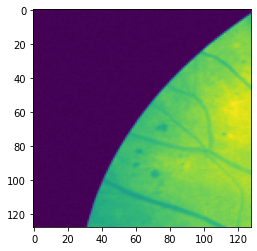

In [11]:
plt.imshow(orig_images[0])

In [12]:
masks=np.array([get_data_gif(path) for path in mask])
masks.shape

(756, 128, 128)

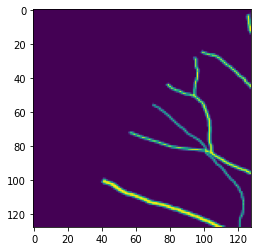

In [13]:
plt.imshow(masks[0])

In [14]:
orig_images = np.expand_dims(orig_images, axis = -1)
masks = np.expand_dims(masks, axis = -1)

In [15]:
masks.shape, orig_images.shape

((756, 128, 128, 1), (756, 128, 128, 1))

In [16]:
orig_images = orig_images / 255
masks = masks / 255

In [17]:
def get_unet():
    inputs = Input((128, 128, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [18]:
model = get_unet()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 64, 64, 32)   0           conv2d_2[0][0]                  

In [19]:
model.fit(orig_images, masks, epochs = 50, batch_size= 16, shuffle = True, validation_split = 0.1)

Train on 680 samples, validate on 76 samples
Epoch 1/50
680/680 [==============================] - 97s 142ms/step - loss: 0.5528 - accuracy: 0.8388 - val_loss: 0.3368 - val_accuracy: 0.8381
Epoch 2/50
680/680 [==============================] - 97s 142ms/step - loss: 0.2750 - accuracy: 0.8399 - val_loss: 0.2391 - val_accuracy: 0.8381
Epoch 3/50
680/680 [==============================] - 98s 143ms/step - loss: 0.2282 - accuracy: 0.8399 - val_loss: 0.2287 - val_accuracy: 0.8381
Epoch 4/50
680/680 [==============================] - 102s 150ms/step - loss: 0.2242 - accuracy: 0.8399 - val_loss: 0.2262 - val_accuracy: 0.8381
Epoch 5/50
680/680 [==============================] - 101s 148ms/step - loss: 0.2217 - accuracy: 0.8399 - val_loss: 0.2252 - val_accuracy: 0.8381
Epoch 6/50
680/680 [==============================] - 100s 147ms/step - loss: 0.2216 - accuracy: 0.8399 - val_loss: 0.2237 - val_accuracy: 0.8381
Epoch 7/50
680/680 [==============================] - 104s 153ms/step - loss: 0.21

In [20]:
PATH2 = 'HRF//test'

In [21]:
t_images=glob.glob(os.path.join(PATH2,'images','*.jpg'))

In [22]:
if not os.path.exists('./HRF/test/output_images'):
    os.makedirs('./HRF/test/output_images')
src = "./HRF/test/images/"
dst = "./HRF/test/output_images/"

In [23]:
cropheight=900
cropwidth = 600
k=-1
for file in t_images:
    k+=1
    im = Image.open(t_images[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (t_images[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (t_images[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

HRF//test\images\15_dr.JPG (0, 0, 600, 900)
HRF//test\images\15_dr.JPG (0, 900, 600, 1800)
HRF//test\images\15_dr.JPG (0, 1800, 600, 2700)
HRF//test\images\15_dr.JPG (600, 0, 1200, 900)
HRF//test\images\15_dr.JPG (600, 900, 1200, 1800)
HRF//test\images\15_dr.JPG (600, 1800, 1200, 2700)
HRF//test\images\15_dr.JPG (1200, 0, 1800, 900)
HRF//test\images\15_dr.JPG (1200, 900, 1800, 1800)
HRF//test\images\15_dr.JPG (1200, 1800, 1800, 2700)
HRF//test\images\15_dr.JPG (1800, 0, 2400, 900)
HRF//test\images\15_dr.JPG (1800, 900, 2400, 1800)
HRF//test\images\15_dr.JPG (1800, 1800, 2400, 2700)
HRF//test\images\15_dr.JPG (2400, 0, 3000, 900)
HRF//test\images\15_dr.JPG (2400, 900, 3000, 1800)
HRF//test\images\15_dr.JPG (2400, 1800, 3000, 2700)
HRF//test\images\15_dr.JPG (3000, 0, 3600, 900)
HRF//test\images\15_dr.JPG (3000, 900, 3600, 1800)
HRF//test\images\15_dr.JPG (3000, 1800, 3600, 2700)
HRF//test\images\15_g.jpg (0, 0, 600, 900)
HRF//test\images\15_g.jpg (0, 900, 600, 1800)
HRF//test\images\15_

In [24]:
PATH3 = 'HRF//test'

In [25]:
t_images=glob.glob(os.path.join(PATH3,'output_images','*.tiff'))

In [26]:
test_images=np.array([get_data(path) for path in t_images])
test_images.shape

(54, 128, 128)

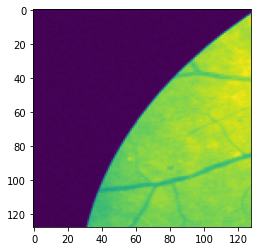

In [27]:
plt.imshow(test_images[0])

In [28]:
test_images = np.expand_dims(test_images, axis = -1)

In [29]:
test_images.shape

(54, 128, 128, 1)

In [30]:
test_images = test_images / 255

In [31]:
imgs_mask_test = model.predict(test_images, verbose=1)

54/54 [==============================] - 2s 35ms/step


In [32]:
#count=0
#idx=0
#DIR="C:\\Users\\subah\\retinaunetdrivecrop\\test\\predicted_masks"
#for i in os.listdir(DIR):
    #image=cv2.imread(os.path.join(DIR, i))
    #blurred_image = motion_blur(image)
    #cv2.imwrite('/path/to/destination/image'+str(count)+'.png',blurred_image) 
    #count+=1
    #i = imgs_mask_test[idx]
    #i = i[:, :, 0]
    #i.shape
    #plt.imshow(imgs_mask_test[idx], cmap='gray')
    #plt.imshow(i, cmap='gray')
    #Image.fromarray(np.uint8(cm.gist_earth(imgs_mask_test[idx])))
    #plt.imshow(imgs_mask_test[idx], cmap='gray')

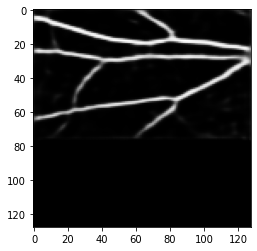

In [33]:
idx = random.randint(0, len(imgs_mask_test))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape
plt.imshow(i, cmap='gray')
plt.imsave('filename.png', i, cmap='gray')

In [34]:
yp = np.round(imgs_mask_test,0)

In [35]:
idx = random.randint(0, len(yp))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape

(128, 128)

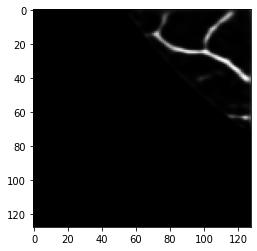

In [36]:
plt.imshow(i, cmap='gray')


In [37]:
PATH4 = 'Stare'

In [38]:
s_images=glob.glob(os.path.join(PATH4,'images','*.tiff'))
s_mask=glob.glob(os.path.join(PATH4,'1st_manual','*.GIF'))

In [39]:
if not os.path.exists('./Stare/ou_images'):
    os.makedirs('./Stare/ou_images')
src2 = "./Stare/images/"
dst2 = "./Stare/ou_images/"
if not os.path.exists('./Stare/ou_1st_manual'):
    os.makedirs('./Stare/ou_1st_manual')
src3= "./Stare/1st_manual/"
dst3 = "./Stare/ou_1st_manual/"

In [40]:
cropheight=350
cropwidth = 350
k=-1
for file in s_images:
    k+=1
    im = Image.open(s_images[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (s_images[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tif' % (s_images[k], i, j))
       files = [i for i in os.listdir(src2) if i.endswith(".tif") and path.isfile(path.join(src2, i))]
       for f in files:
        shutil.move(path.join(src2, f), dst2)

Stare\images\41_training.tiff (0, 0, 350, 350)
Stare\images\41_training.tiff (0, 350, 350, 700)
Stare\images\41_training.tiff (350, 0, 700, 350)
Stare\images\41_training.tiff (350, 350, 700, 700)
Stare\images\42_training.tiff (0, 0, 350, 350)
Stare\images\42_training.tiff (0, 350, 350, 700)
Stare\images\42_training.tiff (350, 0, 700, 350)
Stare\images\42_training.tiff (350, 350, 700, 700)
Stare\images\43_training.tiff (0, 0, 350, 350)
Stare\images\43_training.tiff (0, 350, 350, 700)
Stare\images\43_training.tiff (350, 0, 700, 350)
Stare\images\43_training.tiff (350, 350, 700, 700)
Stare\images\44_training.tiff (0, 0, 350, 350)
Stare\images\44_training.tiff (0, 350, 350, 700)
Stare\images\44_training.tiff (350, 0, 700, 350)
Stare\images\44_training.tiff (350, 350, 700, 700)
Stare\images\45_training.tiff (0, 0, 350, 350)
Stare\images\45_training.tiff (0, 350, 350, 700)
Stare\images\45_training.tiff (350, 0, 700, 350)
Stare\images\45_training.tiff (350, 350, 700, 700)
Stare\images\46_trai

In [41]:
cropheight=350
cropwidth = 350
k=-1
for file in s_mask:
    k+=1
    im = Image.open(s_mask[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (s_mask[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tif' % (s_mask[k], i, j))
       files = [i for i in os.listdir(src3) if i.endswith(".tif") and path.isfile(path.join(src3, i))]
       for f in files:
        shutil.move(path.join(src3, f), dst3)

Stare\1st_manual\41_manual1.gif (0, 0, 350, 350)
Stare\1st_manual\41_manual1.gif (0, 350, 350, 700)
Stare\1st_manual\41_manual1.gif (350, 0, 700, 350)
Stare\1st_manual\41_manual1.gif (350, 350, 700, 700)
Stare\1st_manual\42_manual1.gif (0, 0, 350, 350)
Stare\1st_manual\42_manual1.gif (0, 350, 350, 700)
Stare\1st_manual\42_manual1.gif (350, 0, 700, 350)
Stare\1st_manual\42_manual1.gif (350, 350, 700, 700)
Stare\1st_manual\43_manual1.gif (0, 0, 350, 350)
Stare\1st_manual\43_manual1.gif (0, 350, 350, 700)
Stare\1st_manual\43_manual1.gif (350, 0, 700, 350)
Stare\1st_manual\43_manual1.gif (350, 350, 700, 700)
Stare\1st_manual\44_manual1.gif (0, 0, 350, 350)
Stare\1st_manual\44_manual1.gif (0, 350, 350, 700)
Stare\1st_manual\44_manual1.gif (350, 0, 700, 350)
Stare\1st_manual\44_manual1.gif (350, 350, 700, 700)
Stare\1st_manual\45_manual1.gif (0, 0, 350, 350)
Stare\1st_manual\45_manual1.gif (0, 350, 350, 700)
Stare\1st_manual\45_manual1.gif (350, 0, 700, 350)
Stare\1st_manual\45_manual1.gif (

In [42]:
PATH5 = 'Stare'

In [43]:
t_images=glob.glob(os.path.join(PATH5,'ou_images','*.tif'))

In [44]:
t_mask=glob.glob(os.path.join(PATH5,'ou_1st_manual','*.tif'))

In [45]:
test_images=np.array([get_data(path) for path in t_images])
test_images.shape

(80, 128, 128)

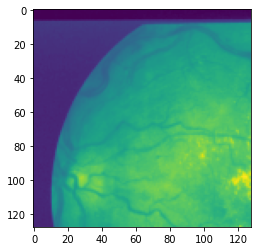

In [46]:
plt.imshow(test_images[0])

In [47]:
test_masks=np.array([get_data(path) for path in t_mask])
test_masks.shape

(80, 128, 128)

In [48]:
test_images = np.expand_dims(test_images, axis = -1)

In [49]:
test_masks = np.expand_dims(test_masks, axis = -1)

In [50]:
test_images.shape

(80, 128, 128, 1)

In [51]:
test_masks.shape

(80, 128, 128, 1)

In [52]:
test_images = test_images / 255

In [53]:
test_masks = test_masks / 255

In [54]:
imgs_mask_test = model.predict(test_images, verbose=1)

80/80 [==============================] - 3s 35ms/step


In [55]:
idx = random.randint(0, len(imgs_mask_test))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape

(128, 128)

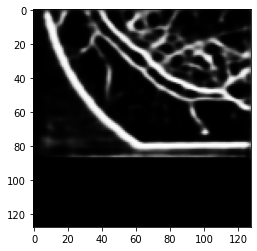

In [56]:
plt.imshow(i, cmap='gray')

In [57]:
yp = np.round(imgs_mask_test,0)

In [58]:
idx = random.randint(0, len(yp))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape

(128, 128)

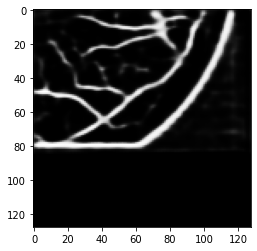

In [59]:
plt.imshow(i, cmap='gray')
plt.imsave('drive.png', i, cmap='gray')

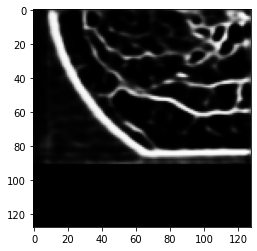

In [60]:
plt.imshow(imgs_mask_test[1], cmap='gray')

In [61]:
score= model.evaluate(test_masks,imgs_mask_test, verbose=1)

80/80 [==============================] - 3s 37ms/step


In [62]:
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 2.5355796813964844
Test accuracy: 0.14171676337718964


In [63]:
np.min(test_images)

0.0

In [64]:
np.max(test_images)

0.9686274509803922

In [65]:
np.min(test_masks)

0.0

In [66]:
np.max(test_masks)

1.0

In [67]:
np.min(imgs_mask_test)

0.0

In [68]:
np.max(imgs_mask_test)

0.99146557

In [69]:
imgs_mask_test = model.predict(test_images, verbose=1)

80/80 [==============================] - 3s 38ms/step


In [70]:
if not os.path.exists('./Stare/predict'):
    os.makedirs('./Stare/predict')
src4= "./Stare/1st_manual/"
dst4 = "./Stare/predict/"

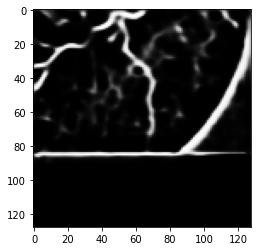

In [71]:
idx = random.randint(0, len(imgs_mask_test))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape
plt.imshow(i, cmap='gray')
plt.imsave('filename.png', i, cmap='gray')

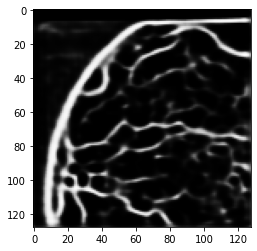

In [72]:
plt.imshow(imgs_mask_test[0], cmap='gray')

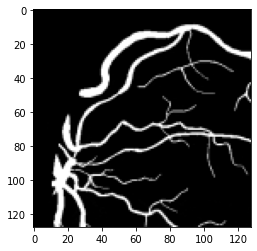

In [73]:
plt.imshow(test_masks[0], cmap='gray')

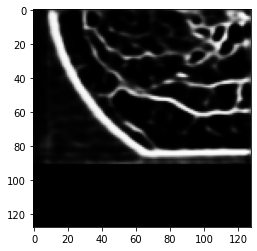

In [74]:
plt.imshow(imgs_mask_test[1], cmap='gray')

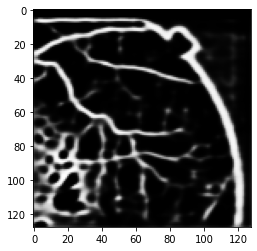

In [75]:
plt.imshow(imgs_mask_test[2], cmap='gray')

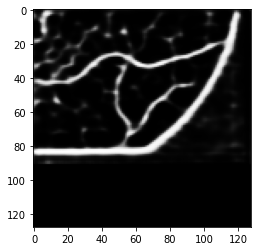

In [76]:
plt.imshow(imgs_mask_test[3], cmap='gray')

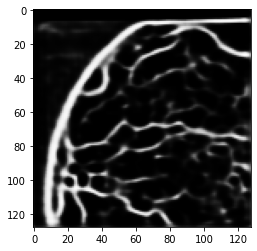

In [77]:
idx = random.randint(0, len(imgs_mask_test))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape
plt.imshow(i, cmap='gray')
plt.imsave('filename.png', i, cmap='gray')